In [12]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import scienceplots as sp
import seaborn as sns

column_width = 3.5

with plt.style.context(['science']):
    sci_cycle = plt.rcParams['axes.prop_cycle']

In [13]:
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
SHOW = True

In [14]:
df_cifar = pd.read_csv('./results/us_results_cifar.csv')

In [15]:
df_cifar

,Model Name,1.0,0.975,0.95,0.925,0.9,0.875,0.85,0.825,0.8,...,0.475,0.45,0.425,0.4,0.375,0.35,0.325,0.3,0.275,0.25
0,usresnet20,0.6606,0.6606,0.6606,0.6436,0.6436,0.6436,0.6436,0.6346,0.6237,...,0.5375,0.5375,0.5375,0.4986,0.4986,0.4986,0.4986,0.4986,0.4290,0.4290
1,usresnet32,0.6808,0.6808,0.6808,0.6710,0.6710,0.6710,0.6710,0.6651,0.6523,...,0.5777,0.5777,0.5777,0.5281,0.5281,0.5281,0.5281,0.5281,0.4641,0.4641
2,usresnet44,0.6973,0.6973,0.6973,0.6868,0.6868,0.6868,0.6868,0.6796,0.6657,...,0.5924,0.5924,0.5924,0.5566,0.5566,0.5566,0.5566,0.5566,0.4823,0.4823
3,usresnet56,0.7019,0.7019,0.7019,0.6904,0.6904,0.6904,0.6904,0.6849,0.6759,...,0.6115,0.6115,0.6115,0.5699,0.5699,0.5699,0.5699,0.5699,0.5019,0.5019
4,usvgg11_bn,0.6757,0.6738,0.6739,0.6738,0.6734,0.6729,0.6712,0.6710,0.6709,...,0.6426,0.6354,0.6291,0.6250,0.6184,0.6106,0.6074,0.6001,0.5902,0.5917
5,usvgg13_bn,0.7062,0.7054,0.7043,0.7036,0.7057,0.7047,0.7038,0.7041,0.7024,...,0.6711,0.6616,0.6573,0.6463,0.6436,0.6312,0.6246,0.6203,0.6104,0.6059
6,usvgg16_bn,0.7101,0.7093,0.7097,0.7094,0.7082,0.7080,0.7067,0.7054,0.7048,...,0.6767,0.6715,0.6692,0.6602,0.6577,0.6517,0.6452,0.6405,0.6326,0.6287
7,usvgg19_bn,0.7068,0.7066,0.7049,0.7035,0.7035,0.7039,0.7031,0.7045,0.7033,...,0.6671,0.6628,0.6587,0.6529,0.6437,0.6340,0.6245,0.6234,0.6141,0.6115


In [16]:
df_cifar = df_cifar.melt(id_vars=['Model Name'], var_name='sparsity', value_name='value')

In [17]:
df_cifar = df_cifar.sort_values(by=['Model Name', 'sparsity'])

In [18]:
df_cifar

,Model Name,sparsity,value
240,usresnet20,0.25,0.4290
232,usresnet20,0.275,0.4290
224,usresnet20,0.3,0.4986
216,usresnet20,0.325,0.4986
208,usresnet20,0.35,0.4986
...,...,...,...
39,usvgg19_bn,0.9,0.7035
31,usvgg19_bn,0.925,0.7035
23,usvgg19_bn,0.95,0.7049
15,usvgg19_bn,0.975,0.7066


In [19]:
pattern_vgg = r'vgg'
pattern_resnet = r'resnet'

# Filter rows where "Model Name" matches the regex pattern
df_cifar_vgg = df_cifar[df_cifar['Model Name'].str.contains(pattern_vgg, regex=True, case=False)]
df_cifar_resnet = df_cifar[df_cifar['Model Name'].str.contains(pattern_resnet, regex=True, case=False)]

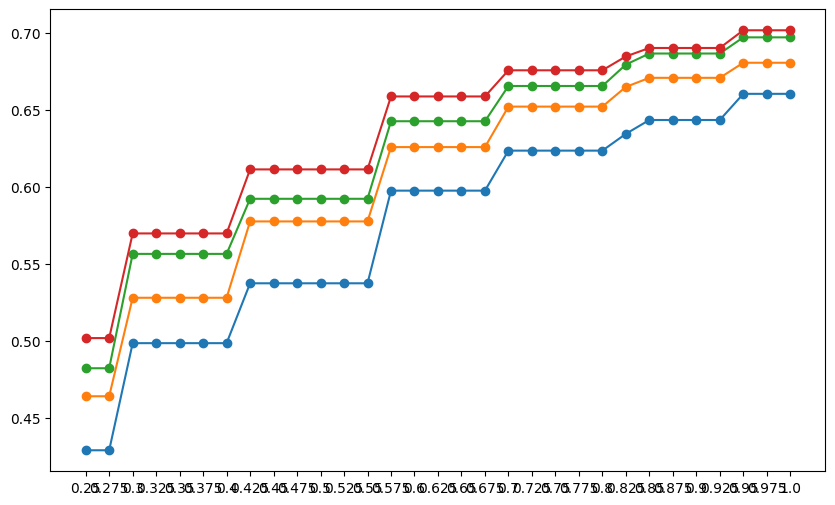

In [20]:
# Plotting
plt.figure(figsize=(10, 6))
for model_name, group in df_cifar_resnet.groupby('Model Name'):
    plt.plot(group['sparsity'], group['value'], marker='o', label=model_name)

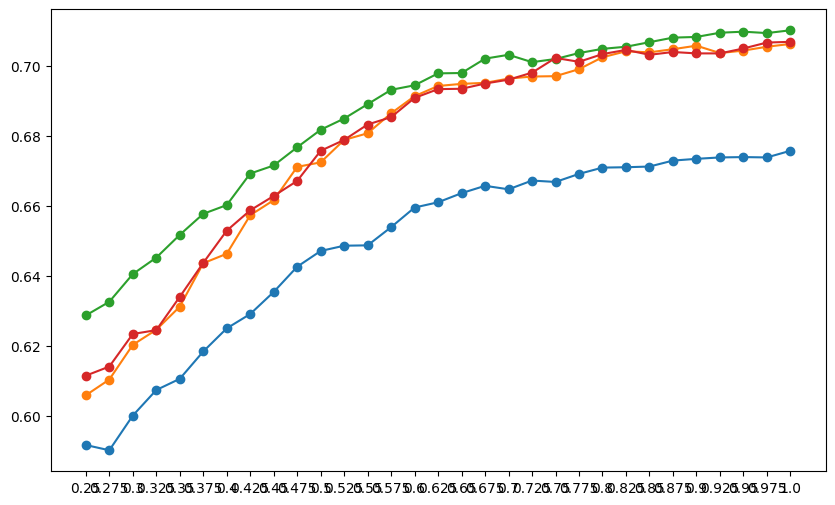

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
for model_name, group in df_cifar_vgg.groupby('Model Name'):
    plt.plot(group['sparsity'], group['value'], marker='o', label=model_name)